# Importations 

In [1]:
import gc, random

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import SimpleITK as sitk
from PIL import Image
import cv2

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import albumentations as A

from Utils.plots import * 
from datasets.merging_dataset import * 

# Augmentations examples 

In [2]:
image  = sitk.GetArrayFromImage(sitk.ReadImage('input/hippocampal-croped-mri/all_data/LR_Left/S1_LR_Left.nii')[:,:,50])
mask = sitk.GetArrayFromImage(sitk.ReadImage('input/hippocampal-croped-mri/all_data/Mask_Left/S1_Mask_Left.nii' ,sitk.sitkInt8)[:,:,50])

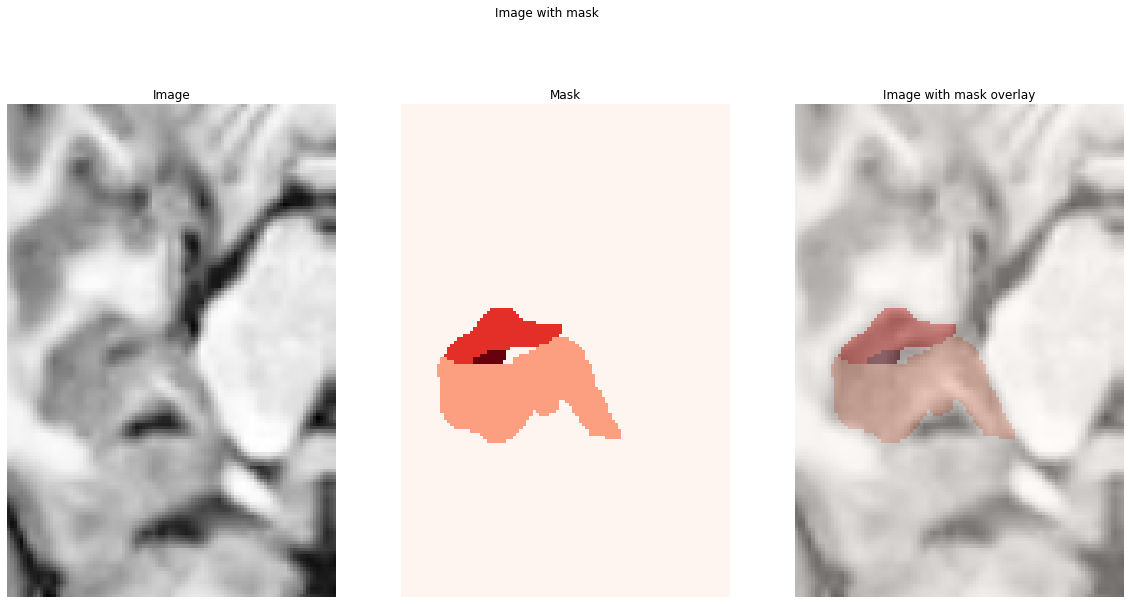

In [3]:
# plot image and a mask
plot_image_and_mask(image, mask)

In [4]:
aug = get_training_augmentation()

[get_training_augmentation]  resize_to: (160, 160)


In [5]:
transformed = aug(image=image,
                        mask=mask,
                        )

image_transformed = transformed['image']

mask_transformed = transformed['mask']


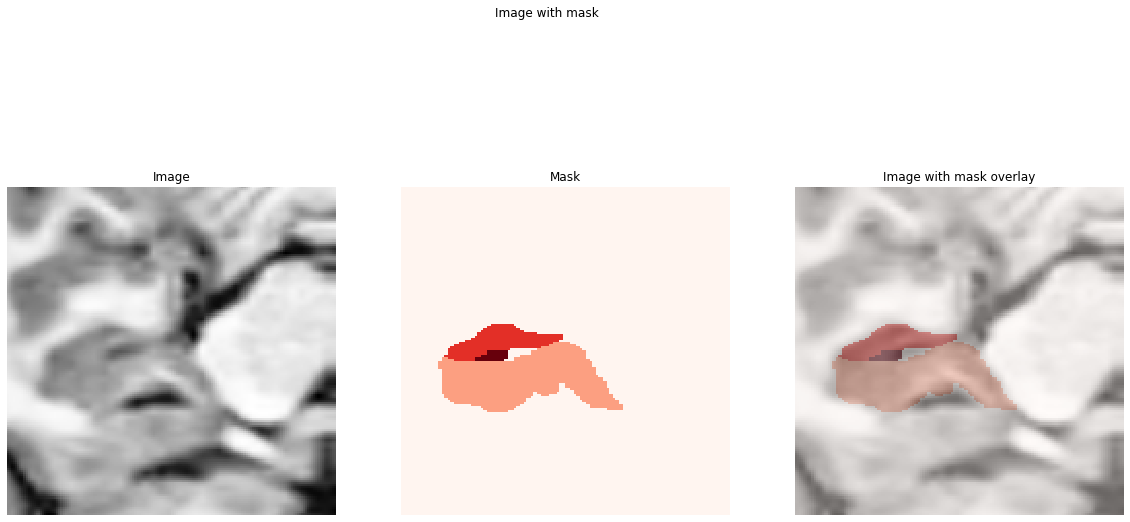

In [6]:
# plot image and a mask
plot_image_and_mask(image_transformed, mask_transformed)

# TEST THE DATA SET CLASS

In [7]:
all_data = pd.read_csv('data_5fold.csv')
subjects = all_data[all_data['slice']==0]
data = Merging_data_set(all_data ,  subjects  , Left = True , is_train = True)
example = data[100]
image_hr  = example['HR'].numpy()
image_lr  = example['LR'].numpy()
mask  = torch.argmax(example['label'], dim=0).numpy()

[get_training_augmentation]  resize_to: (160, 160)


In [8]:
image_hr.shape

(160, 160)

In [9]:
image_lr.shape

(160, 160)

In [10]:
mask.shape

(160, 160)

In [11]:
def plot_HR_LR__mask(HR,LR, mask):
  
    fig, axs = plt.subplots(1, 3, figsize=(20,10))

    #plot the original data
    axs[0].imshow(HR , cmap=plt.cm.Greys_r)
    axs[0].axis('off')
    axs[0].set_title('HR image')

    #plot the mask
    axs[1].imshow(LR , cmap=plt.cm.Greys_r)
    axs[1].axis('off')   
    axs[1].set_title('LR image')
    
    #plot image and add the mask
    axs[2].imshow(mask, cmap = "Reds")
    axs[2].axis('off')   
    axs[2].set_title('LR with mask overlay')

    plt.show()

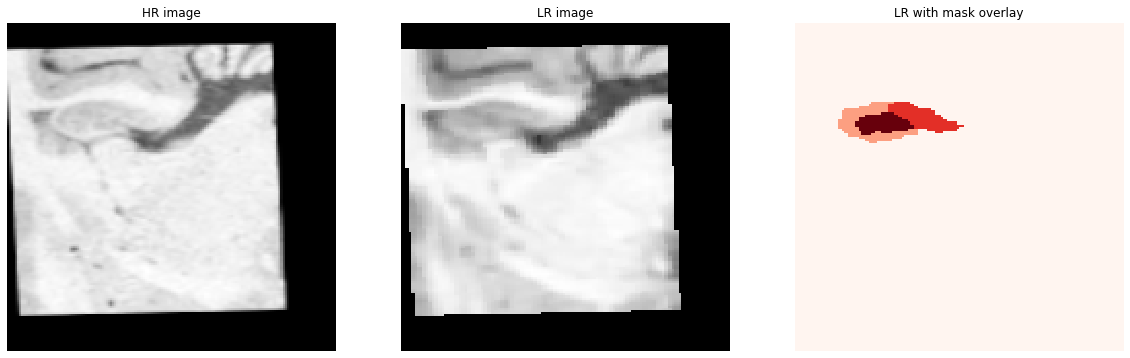

In [12]:
plot_HR_LR__mask(image_hr,image_lr,mask)